# How does ocean temperature vary with location, depth, and time of year?

<img src="https://manoa.hawaii.edu/exploringourfluidearth/sites/default/files/styles/half-page-width/public/M1U2-SF%20Fig2-5%20Summer%20%26%20Winter%20Temp.png" width="400" class="center"/>

<img src="https://manoa.hawaii.edu/exploringourfluidearth/sites/default/files/styles/half-page-width/public/M1U2-SF%20Fig2-6%20Tropics%20Location.png" width="400" class="center"/>


#### https://manoa.hawaii.edu/exploringourfluidearth/physical/world-ocean/introduction-world-ocean

# Sea Temperature Image Service

In [1]:
from arcgis.features import SpatialDataFrame
from arcgis.raster import ImageryLayer
from arcgis.geometry import Geometry, Point
from arcgis.gis import GIS

gis = GIS()

In [2]:
img_svc ="https://sampleserver6.arcgisonline.com/arcgis/rest/services/ScientificData/SeaTemperature/ImageServer"
img_lyr = ImageryLayer(img_svc)

# Ocean Locations

In [3]:
lat_lon = [[-21.005859,-1.193764],[-44.912109,27.560226],[-28.388672,60.475268], [27.949219,73.28199]]

In [4]:
locations = []
for point in lat_lon:
    locations.append(Point(point))

In [5]:
locations

[{'x': -21.005859, 'y': -1.193764, 'spatialReference': {'wkid': 4326}},
 {'x': -44.912109, 'y': 27.560226, 'spatialReference': {'wkid': 4326}},
 {'x': -28.388672, 'y': 60.475268, 'spatialReference': {'wkid': 4326}},
 {'x': 27.949219, 'y': 73.28199, 'spatialReference': {'wkid': 4326}}]

# Defining a symbology for the features when I draw them on the map

In [6]:
symbol = {"color":[0,0,128,128],
                    "size":18,
                    "angle":0,
                    "xoffset":0,
                    "yoffset":0,
                    "type":"esriSMS",
                    "style":
                    "esriSMSCircle",
                    "outline":
                        {"color":[0,0,128,255],
                         "width":1,
                         "type":"esriSLS",
                         "style":"esriSLSSolid"}
}

In [7]:
world_map = gis.map()
world_map.basemap = 'oceans'
world_map

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
#world_map.add_layer(img_lyr)
for l in locations:
    world_map.draw(l, symbol=symbol)

# What does the map look like at different depths?

# Depth = 4

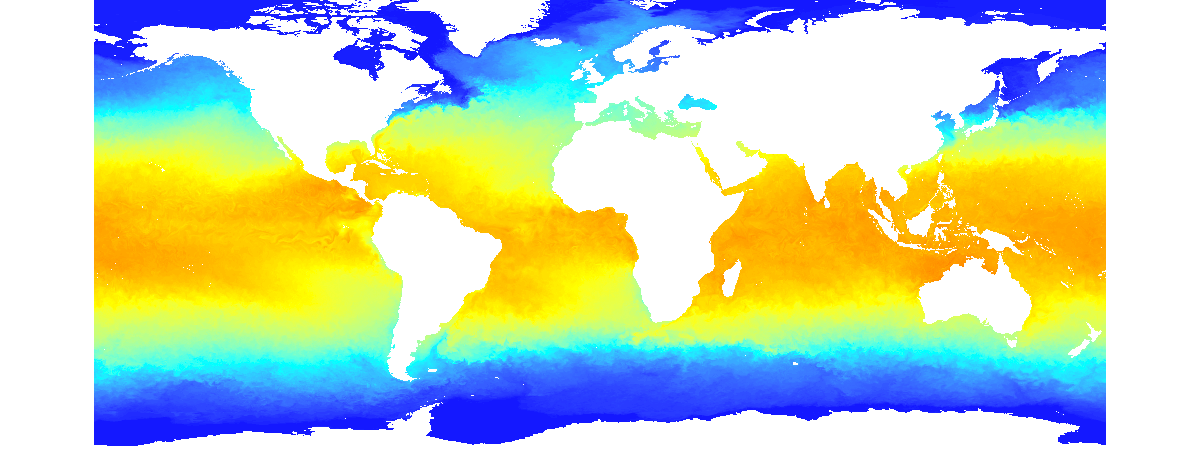

In [10]:
selected_4 = img_lyr.filter_by(where="StdZ = -4")
selected_4

## Depth = 150

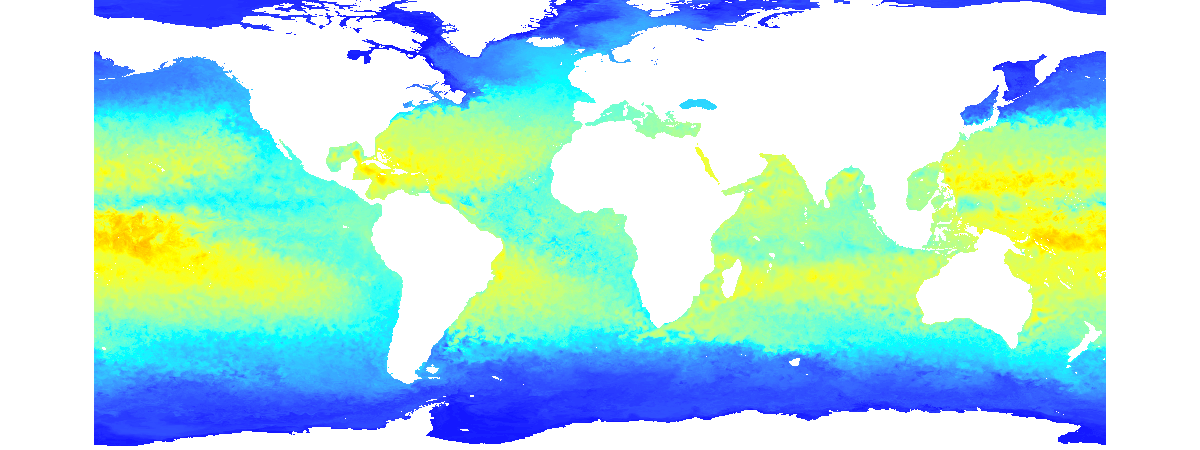

In [11]:
selected_150 = img_lyr.filter_by(where="StdZ = -150")#, geometry=the_geom)
selected_150

## Depth = 1250

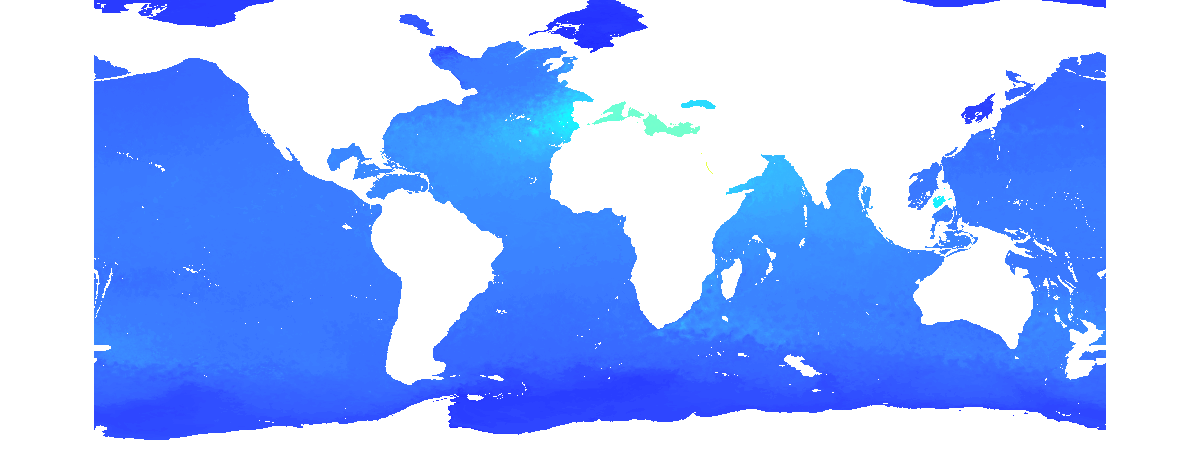

In [12]:
selected_1250 = img_lyr.filter_by(where="StdZ = -1250")#, geometry=the_geom)
selected_1250

# Depth = 5000

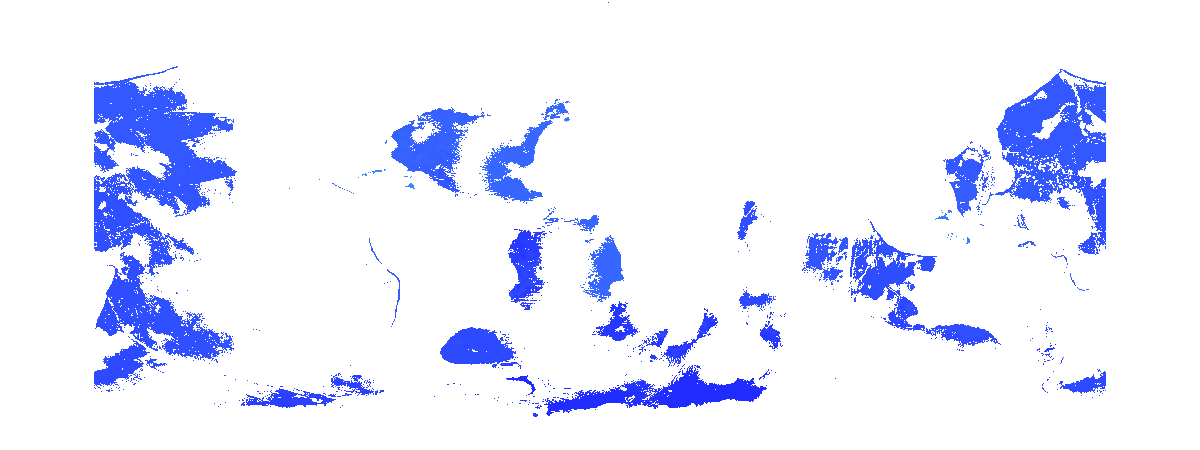

In [13]:
selected_5000 = img_lyr.filter_by(where="StdZ = -5000")#, geometry=the_geom)
selected_5000

# We have temperature at difference depths, but what about times?

# How many records are there? What times were they collected? How many depths do the cover?

In [14]:
img_sdf = img_lyr.query(return_all_records=True).sdf
img_sdf.head()

,OBJECTID,Name,MinPS,MaxPS,LowPS,HighPS,Category,Tag,GroupName,ProductName,CenterX,CenterY,ZOrder,Shape_Length,Shape_Area,Variable,Dimensions,StdTime,StdZ,SHAPE
0,1,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,0,2,0.08,0.08,1,water_temp,374D92CB923FA36D5FC1671135624EEC,NetCDF,5.684342e-14,5.684342e-14,None,1040.16,57628.8,water_temp,"StdTime, StdZ",2014-04-07,0,"{'rings': [[[-167.18283359999998, -80.03999999..."
1,2,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,0,2,0.08,0.08,1,water_temp,E3C284936B86AF1824615DA6DB8A4001,NetCDF,5.684342e-14,5.684342e-14,None,1040.16,57628.8,water_temp,"StdTime, StdZ",2014-04-07,-2,"{'rings': [[[-167.18283359999998, -80.03999999..."
2,3,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,0,2,0.08,0.08,1,water_temp,AC4E2C5D9479A0C1C34B1654007F30C4,NetCDF,5.684342e-14,5.684342e-14,None,1040.16,57628.8,water_temp,"StdTime, StdZ",2014-04-07,-4,"{'rings': [[[-167.18283359999998, -80.03999999..."
3,4,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,0,2,0.08,0.08,1,water_temp,7153862BAFD00BD1FF65449693A2B0E1,NetCDF,5.684342e-14,5.684342e-14,None,1040.16,57628.8,water_temp,"StdTime, StdZ",2014-04-07,-6,"{'rings': [[[-167.18283359999998, -80.03999999..."
4,5,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,0,2,0.08,0.08,1,water_temp,487FF566AD8D5ACFCFB86080DFD4C9CD,NetCDF,5.684342e-14,5.684342e-14,None,1040.16,57628.8,water_temp,"StdTime, StdZ",2014-04-07,-8,"{'rings': [[[-167.18283359999998, -80.03999999..."


## How many records are there?

In [15]:
len(img_sdf)

2760

## How many times are there?

In [16]:
time_list = img_sdf.StdTime.tolist()
times = list(set(time_list))
times.sort()
len(times)

69

## How many depths are there?

In [17]:
depth_list = img_sdf.StdZ.tolist()
depths = list(set(depth_list))
depths.sort(reverse=True)
len(depths)

40

# Depths x Times should equal the length of the dataframe

In [18]:
len(depths)*len(times)

2760

# Let's sample 4 different times at each location

In [23]:
sample_times = times[0::18]
sample_times.sort()

# Let's use *Identify* to sample the pixel values

In [24]:
temperatures = {}
for loc_idx,location in enumerate(locations):
    temperatures[loc_idx] = {}
    for t_idx, t in enumerate(sample_times):
        temperatures[loc_idx][t]={}
        val_list = []
        for idx,depth in enumerate(depths):
            selected = img_lyr.filter_by(where="StdZ = "+str(depth))
            pixel = selected.identify(geometry=location, time_extent=t)

            try:
                pix = float(pixel['value'])
                val_list.append(pix)
                temperatures[loc_idx][t]=val_list
            except:
                print("NoData")

NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData
NoData


## Save the results as a picke file so I don't have to requery everything for a demo

In [33]:
import pickle
profile_pickle = open("temperature_dict.p","wb")
pickle.dump(temperatures, profile_pickle)
profile_pickle.close()

## Save the results as a picke file so I don't have to requery everything for a demo

In [34]:
import pickle
temperatures = pickle.load(open("temperature_dict.p","rb"))

In [35]:
temperatures

{0: {Timestamp('2014-04-07 00:00:00'): [27.771,
   27.112,
   27.126,
   27.136,
   27.138,
   27.139,
   27.139,
   27.139,
   27.1,
   27.037,
   27.037,
   27.245,
   27.245,
   27.245,
   23.35,
   20.403,
   18.938,
   17.505,
   16.208,
   15.152,
   14.771,
   14.739,
   14.106,
   13.02,
   11.739,
   10.265,
   8.869,
   6.566,
   5.948,
   5.53,
   4.974,
   4.578,
   4.472,
   4.434,
   4.085,
   3.436,
   3.124,
   2.72,
   2.201,
   0.084],
  Timestamp('2014-04-28 00:00:00'): [27.961,
   27.967,
   27.977,
   27.986,
   27.995,
   28.007,
   28.02,
   28.051,
   28.131,
   28.282,
   28.282,
   27.11,
   26.048,
   25.296,
   24.472,
   23.089,
   21.887,
   20.759,
   19.678,
   18.664,
   16.808,
   15.051,
   12.713,
   10.96,
   9.845,
   8.844,
   7.943,
   6.694,
   5.849,
   5.192,
   4.494,
   4.348,
   4.348,
   4.414,
   4.22,
   3.552,
   3.134,
   2.659,
   2.214,
   0.106],
  Timestamp('2014-05-21 00:00:00'): [27.63,
   27.581,
   27.574,
   27.567,
   27.559,

# What dates am I sampling

In [43]:
from datetime import datetime

js = []
for key in temperatures[0]:
    print(key)#.strftime("%m/%d/%Y"))
    #print(datetime.fromtimestamp(key/1000).strftime("%m/%d/%Y"))
    js.append(key)#.strftime("%m/%d/%Y"))
    
dts = [j for j in js]

2014-04-07 00:00:00
2014-04-28 00:00:00
2014-05-21 00:00:00
2014-06-15 00:00:00


# Let's visualize the results as a series of subplots

# Let's set the plot parameters

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns

plt.style.use('fivethirtyeight')
#sns.set_context("paper")
#sns.set_context("talk")

# Let's show the temperature profiles

2014-04-07 00:00:00
2014-04-28 00:00:00
2014-05-21 00:00:00
2014-06-15 00:00:00


<Figure size 1152x1152 with 0 Axes>

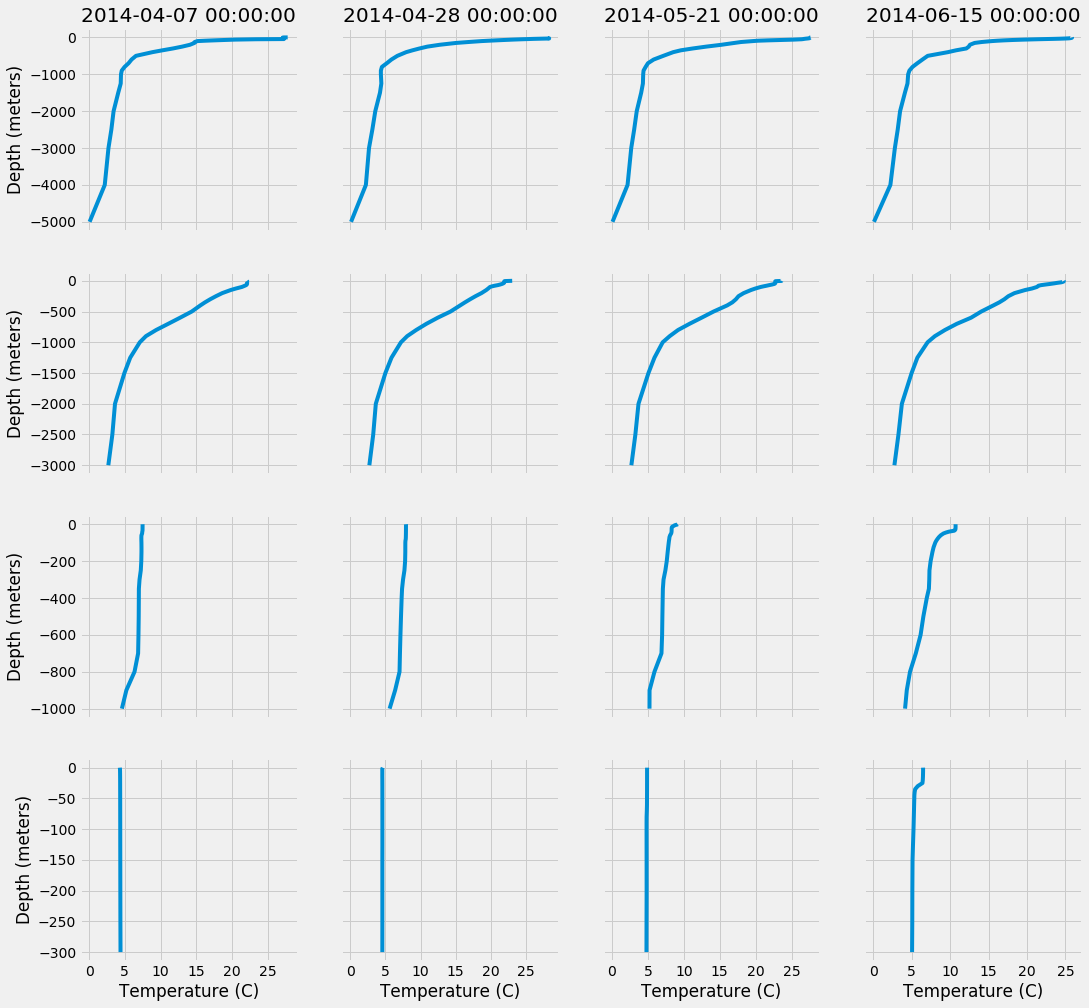

In [45]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')

fig, ax = plt.subplots(4, 4, sharex='col', sharey='row')
fig.set_figheight(16)
fig.set_figwidth(16)

for i in range(4):
    for j in range(4):
        ax[i, j].plot(temperatures[i][js[j]],depths[:len(temperatures[i][js[j]])])#,  "*b",label='linear') 
        if i == 0:
            print(js[j])
            plt.setp(ax[i, j],title=dts[j])
        if i == 3:
            plt.setp(ax[i, j], 
                 xticks=[0,5,10,15,20,25],
                 xlabel = "Temperature (C)")
        if j == 0:
            plt.setp(ax[i, j],
                 ylabel = "Depth (meters)")

In [46]:
        #plt.setp(ax[i, j], 
        #         title=datetime.fromtimestamp(js[j]/1000).strftime("%m/%d/%Y"),
        #         xticks=[0,5,10,15,20,25],
        #         xlabel = "Temperature (C)",
        #         ylabel = "Depth (meters)")

<Figure size 1152x1152 with 0 Axes>

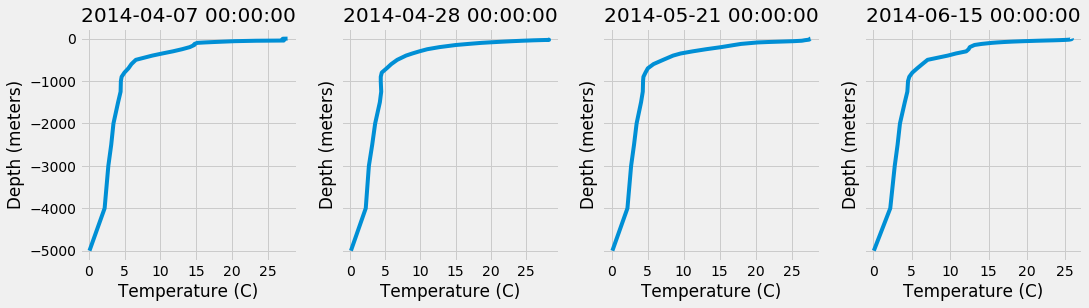

In [48]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(16)
for j in range(4):
    ax[j].plot(temperatures[0][js[j]],depths[:len(temperatures[0][js[j]])])
    plt.setp(ax[j], title=js[j],
             xticks=[0,5,10,15,20,25],xlabel = "Temperature (C)", ylabel = "Depth (meters)")

<Figure size 1152x1152 with 0 Axes>

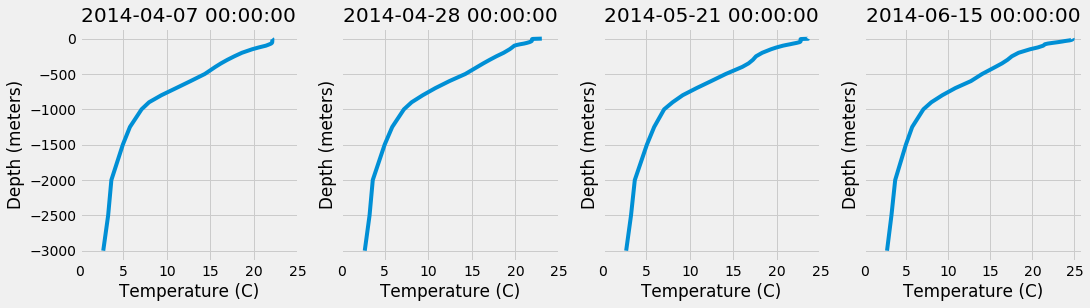

In [49]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(16)
for j in range(4):
    ax[j].plot(temperatures[1][js[j]],depths[:len(temperatures[1][js[j]])])
    plt.setp(ax[j], title=js[j],
             xticks=[0,5,10,15,20,25],xlabel = "Temperature (C)", ylabel = "Depth (meters)")

<Figure size 1152x1152 with 0 Axes>

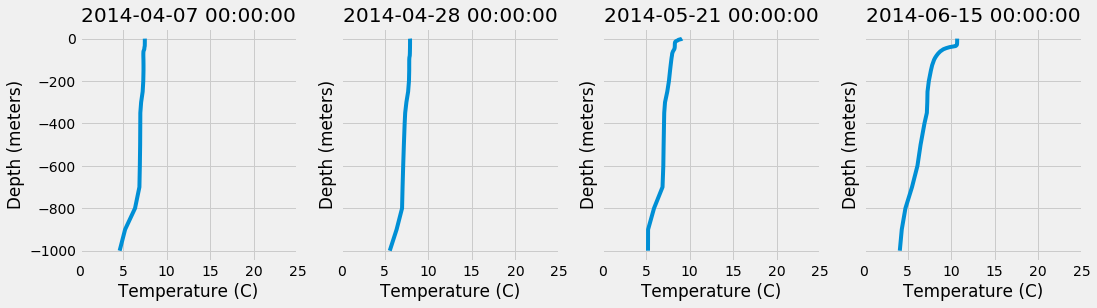

In [50]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(16)
for j in range(4):
    ax[j].plot(temperatures[2][js[j]],depths[:len(temperatures[2][js[j]])])
    plt.setp(ax[j], title=js[j],
             xticks=[0,5,10,15,20,25],xlabel = "Temperature (C)", ylabel = "Depth (meters)")

<Figure size 1152x1152 with 0 Axes>

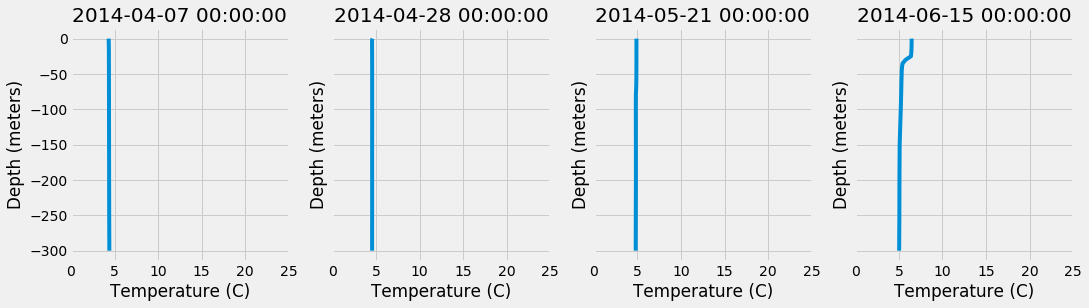

In [51]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(16)
for j in range(4):
    ax[j].plot(temperatures[3][js[j]],depths[:len(temperatures[3][js[j]])])
    plt.setp(ax[j], title=js[j],
             xticks=[0,5,10,15,20,25],xlabel = "Temperature (C)", ylabel = "Depth (meters)")

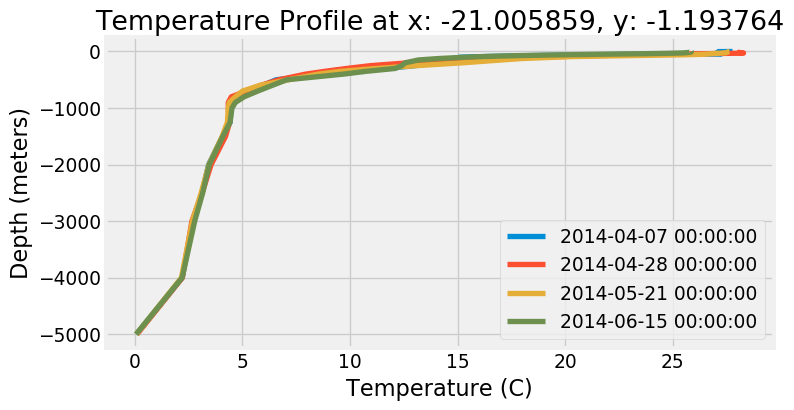

In [52]:
plt.figure(figsize=(8,4), dpi= 96, facecolor='w', edgecolor='k')
for j in range(4):
    plt.plot(temperatures[0][js[j]],depths[:len(temperatures[0][js[j]])])
plt.xlabel("Temperature (C)");
plt.ylabel("Depth (meters)");
plt.title('Temperature Profile at x: -21.005859, y: -1.193764');
plt.legend(dts)

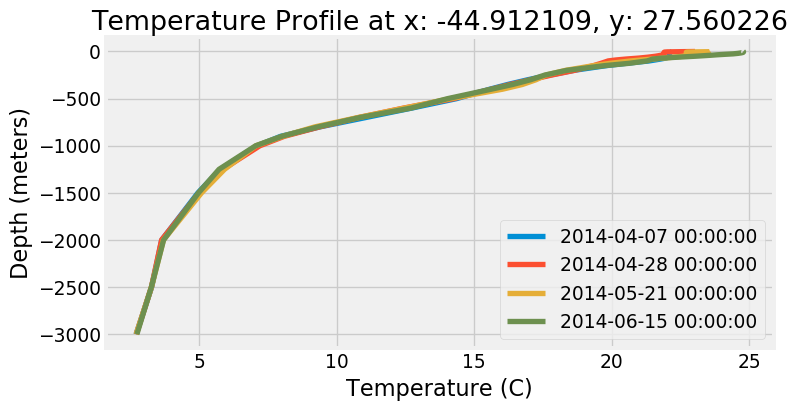

In [53]:
plt.figure(figsize=(8,4), dpi= 96, facecolor='w', edgecolor='k')
for j in range(4):
    plt.plot(temperatures[1][js[j]],depths[:len(temperatures[1][js[j]])])
plt.xlabel("Temperature (C)")
plt.ylabel("Depth (meters)")
plt.title('Temperature Profile at x: -44.912109, y: 27.560226')
plt.legend(dts)

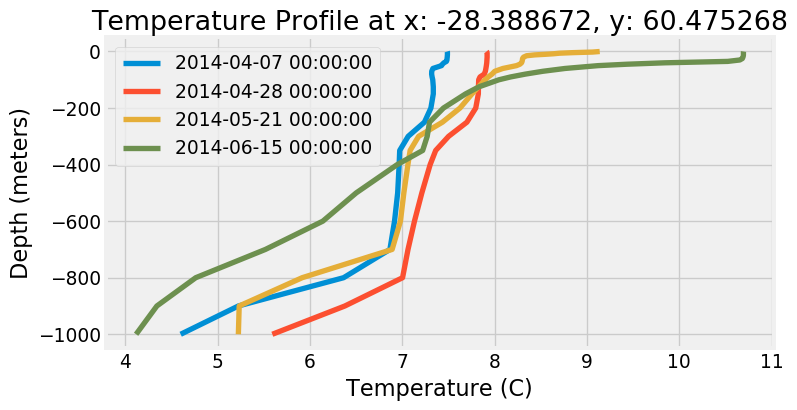

In [54]:
plt.figure(figsize=(8, 4), dpi= 96, facecolor='w', edgecolor='k')
for j in range(4):
    plt.plot(temperatures[2][js[j]],depths[:len(temperatures[2][js[j]])])
plt.xlabel("Temperature (C)")
plt.ylabel("Depth (meters)")
plt.title('Temperature Profile at x: -28.388672, y: 60.475268')
plt.legend(dts)

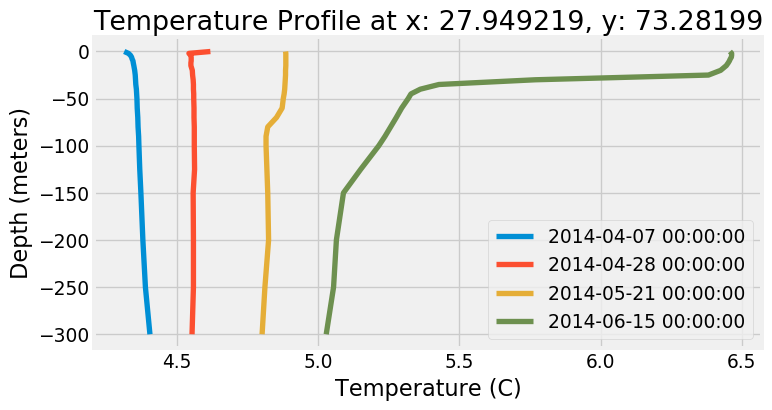

In [55]:
plt.figure(figsize=(8, 4), dpi= 96, facecolor='w', edgecolor='k')
for j in range(4):
    plt.plot(temperatures[3][js[j]],depths[:len(temperatures[3][js[j]])])
plt.xlabel("Temperature (C)")
plt.ylabel("Depth (meters)")
plt.title('Temperature Profile at x: 27.949219, y: 73.28199')
plt.legend(dts)